In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
cr = pd.read_csv('/kaggle/input/creditrisk/CreditRisk.csv')

In [6]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking Null Values

In [7]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## Filling Null Values

In [8]:
cr.Gender.fillna('Male',inplace = True)
cr.Married.fillna('Yes',inplace = True)
cr.Dependents.fillna(0,inplace = True)
cr.Self_Employed.fillna('No',inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(),inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(),inplace= True)
cr.Credit_History.fillna(0,inplace = True)

In [9]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
cr.select_dtypes(include = 'object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
cr.Loan_Status = cr.Loan_Status.replace({'Y':1,'N':0})

## Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [18]:
cr.Gender = le.fit_transform(cr, cr.Gender)
cr.Married = le.fit_transform(cr,cr.Married)
cr.Education = le.fit_transform(cr,cr.Education)
cr.Self_Employed = le.fit_transform(cr,cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr,cr.Property_Area)

In [19]:
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1,1,4.0,1,1,4009,1777.0,113.00000,360.0,1.0,2,1
977,LP002975,1,1,0.0,0,0,4158,709.0,115.00000,360.0,1.0,2,1
978,LP002980,1,0,0.0,0,0,3250,1993.0,126.00000,360.0,0.0,1,1
979,LP002986,1,1,0.0,0,0,5000,2393.0,158.00000,360.0,1.0,0,0


In [21]:
cr.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1


In [22]:
cr = cr.drop(['Loan_ID'],axis =1 )

In [23]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


## Sampling

In [24]:
from sklearn.model_selection import train_test_split

train_cr, test_cr = train_test_split(cr,test_size = 0.2)

In [26]:
train_cr_x = train_cr.iloc[:,:-1]
train_cr_y = train_cr.iloc[:,-1]

In [27]:
test_cr_x = test_cr.iloc[:,:-1]
test_cr_y = test_cr.iloc[:,-1]

## model Building

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [29]:
logreg.fit(train_cr_x,train_cr_y)

LogisticRegression()

## prediction

In [30]:
pred = logreg.predict(test_cr_x)

In [31]:
pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [32]:
test_cr_y

207    1
107    0
152    0
593    1
201    1
      ..
722    1
237    1
926    1
254    0
960    0
Name: Loan_Status, Length: 197, dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
tab1 = confusion_matrix(test_cr_y,pred)

In [35]:
tab1

array([[ 28,  23],
       [ 11, 135]])

In [41]:
Accuracy = tab1.diagonal().sum()*100/tab1.sum()

In [42]:
Accuracy

82.74111675126903

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(test_cr_y,pred)*100

92.46575342465754

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(test_cr_y,pred)*100

88.81578947368422

## AuROC

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

In [48]:
pred_prob =logreg.predict_proba(test_cr_x)

In [50]:
pred_prob[0:5]

array([[0.28240246, 0.71759754],
       [0.28778297, 0.71221703],
       [0.1448861 , 0.8551139 ],
       [0.13429387, 0.86570613],
       [0.6968447 , 0.3031553 ]])

In [51]:
roc_auc_score(test_cr_y,pred_prob[:,1])

0.8025785656728446

In [52]:
fpr,tpr,thresh = roc_curve(test_cr_y,pred_prob[:,1])

In [53]:
import matplotlib.pyplot as plt

Text(0.3, 0.5, 'Area under curve is 0.8025')

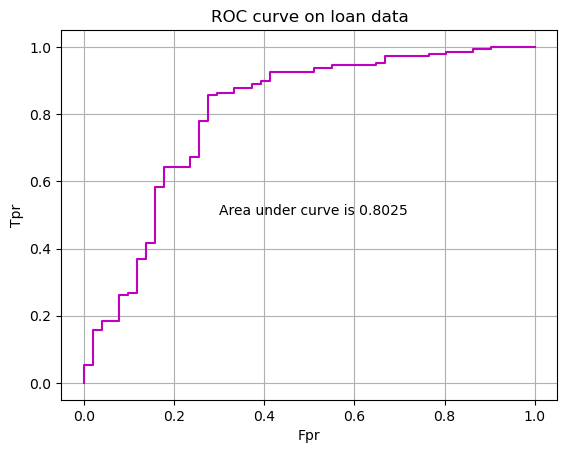

In [56]:
plt.plot(fpr,tpr,color = 'm')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve on loan data')
plt.grid()
plt.text(x = .3,y =.5, s ='Area under curve is 0.8025')

In [57]:
df = pd.DataFrame(tab1,columns =['Loan_Reject','Loan_Approve'])

In [58]:
df

,Loan_Reject,Loan_Approve
0,28,23
1,11,135


In [59]:
df.index =['Loan_Reject',"Loan_Approve"]

In [60]:
df

,Loan_Reject,Loan_Approve
Loan_Reject,28,23
Loan_Approve,11,135


# Conclusion

> ## Actual 51 customers has reject the loan but our model has preducted 23 has rejected the loan and 28 customers approve the loan.

In [61]:
135*100/(11+135)

92.46575342465754